In [ ]:
import pandas as pd

In [ ]:
result = pd.read_csv("final_features.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
# from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [ ]:
y_true = result['is_duplicate']
result.drop(['is_duplicate'],axis=1,inplace=True)
X_train,X_test, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.3)

In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 212)
Number of data points in test data : (30000, 212)


In [ ]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.5 Class 1:  0.5
---------- Distribution of output variable in test data ----------
Class 0:  0.5 Class 1:  0.5


In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)

    A =(((C.T)/(C.sum(axis=1))).T)

    B =(C/C.sum(axis=0))

    plt.figure(figsize=(20,4))

    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

In [ ]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [ ]:

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Log loss on Test Data using Random Model 0.8869826589982713


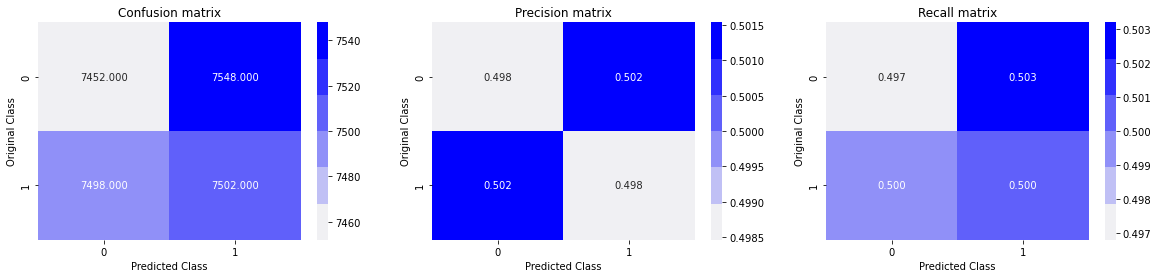

In [ ]:
import scikitplot.metrics as skplt

# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))
predicted_y =np.argmax(predicted_y, axis=1)

plot_confusion_matrix(y_test, predicted_y)
plt.show()

In [ ]:
print("Classification Report\n",classification_report(y_test,predicted_y))

Classification Report
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     15000
           1       0.50      0.50      0.50     15000

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [ ]:
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=42) # XGBoost classifier
svm_clf = SVC(probability=True, random_state=42) # SVM classifier

In [ ]:
ensemble_clf = VotingClassifier(estimators=[('xgb', xgb_clf), ('svm', svm_clf)], voting='soft')

In [ ]:
calibrated_clf = CalibratedClassifierCV(ensemble_clf, method='isotonic', cv=5)

In [ ]:
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

In [ ]:
calibrated_clf.fit(X_train_sub, y_train_sub)

CalibratedClassifierCV(base_estimator=VotingClassifier(estimators=[('xgb',
                                                                    XGBClassifier(base_score=None,
                                                                                  booster=None,
                                                                                  callbacks=None,
                                                                                  colsample_bylevel=None,
                                                                                  colsample_bynode=None,
                                                                                  colsample_bytree=None,
                                                                                  device=None,
                                                                                  early_stopping_rounds=None,
                                                                                  enable_categorical=False,
   

The test log loss is: 0.38521276054740117
Total number of data points: 30000


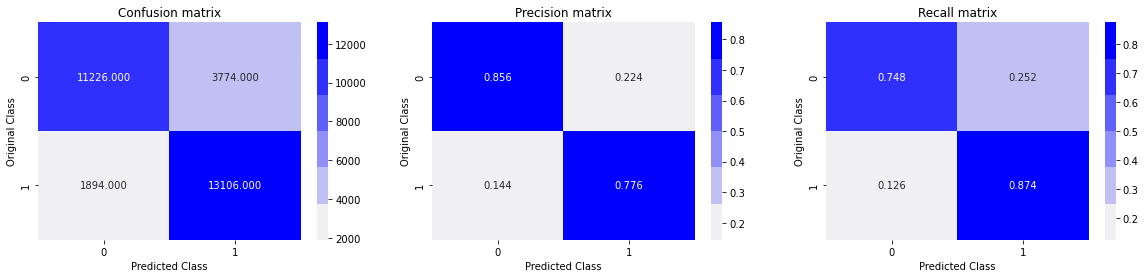

In [ ]:
predict_y = calibrated_clf.predict_proba(X_test)
print('The test log loss is:', log_loss(y_test, predict_y))
predicted_y = calibrated_clf.predict(X_test)
print('Total number of data points:', len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
print("Classification Report\n",classification_report(y_test,predicted_y))

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.75      0.80     15000
           1       0.78      0.87      0.82     15000

    accuracy                           0.81     30000
   macro avg       0.82      0.81      0.81     30000
weighted avg       0.82      0.81      0.81     30000



In [ ]:
#y_pred_test=calibrated_clf.predict_proba(X_test)
y_pred_train=calibrated_clf.predict_proba(X_train)
log_loss_train = log_loss(y_train, y_pred_train, eps=1e-15)
#log_loss_test=log_loss(y_test,y_pred_test,eps=1e-15)
print('Train log loss = ',log_loss_train)

Train log loss =  0.30479694276041863
